# Glioma analysis

## 1. Regression analysis

In [1]:
from utils import load_data, cross_validate_regression

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
X, y = load_data()

models = [
    ('Ridge', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor(n_estimators=30, max_depth=8, n_jobs=-1, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=30, max_depth=4, random_state=42))
]

results_list = []
for model_name, model in models:
    results = cross_validate_regression(X, y, model=model, model_name=model_name)
    results_list.append(results)
    print(f'{model_name} R2: {results["mean_score"]:.2f}')

Ridge R2: -0.62
Decision Tree R2: -3.02
Random Forest R2: -0.21
Gradient Boosting R2: -0.88


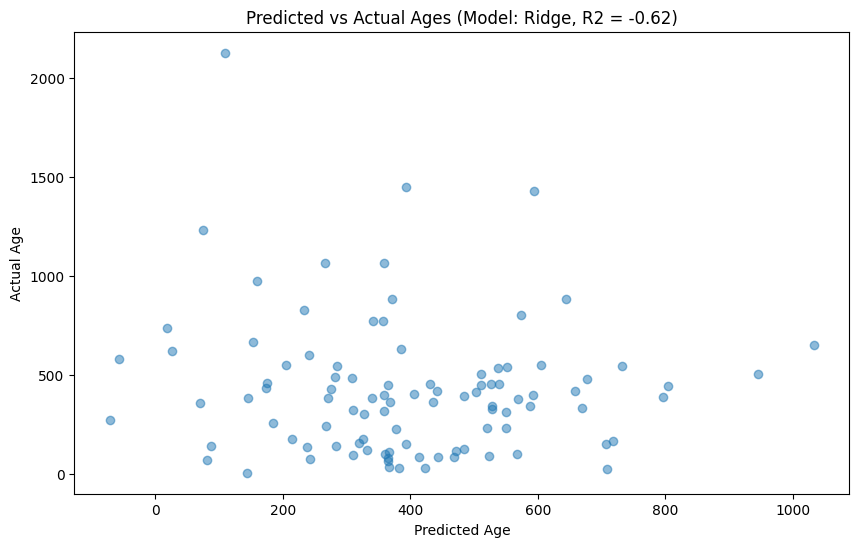

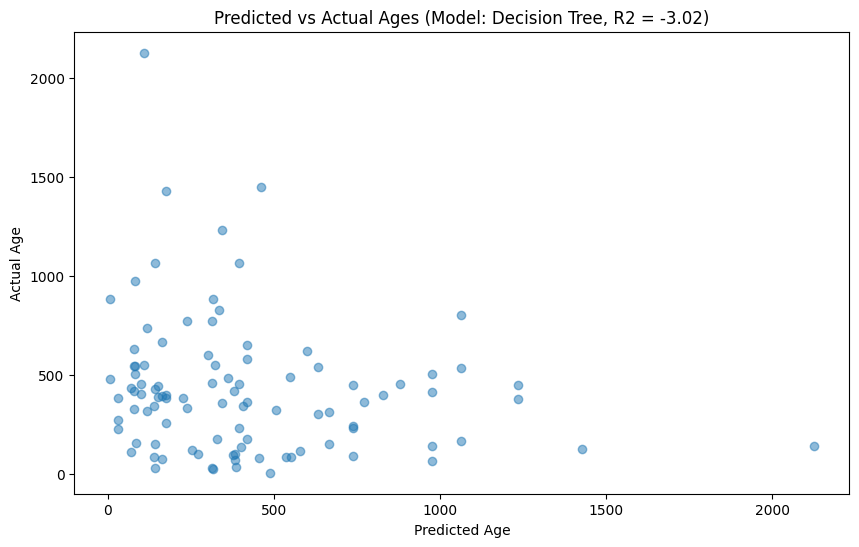

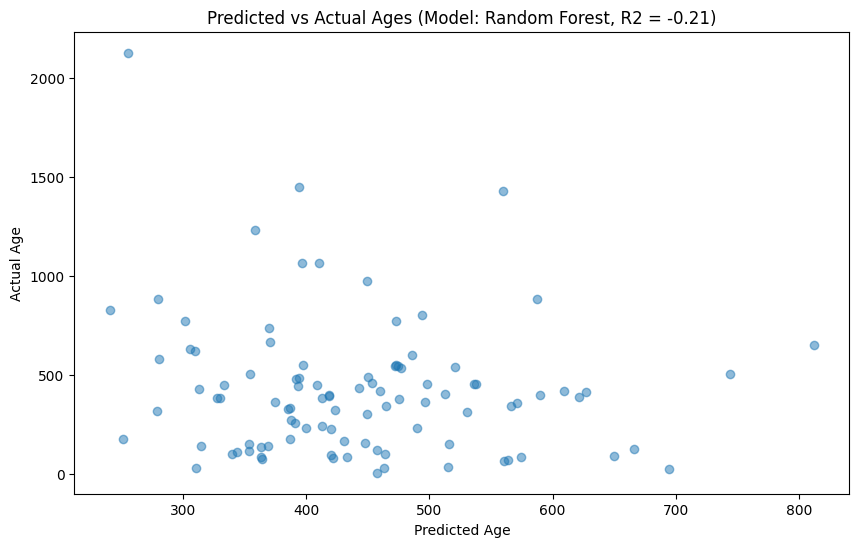

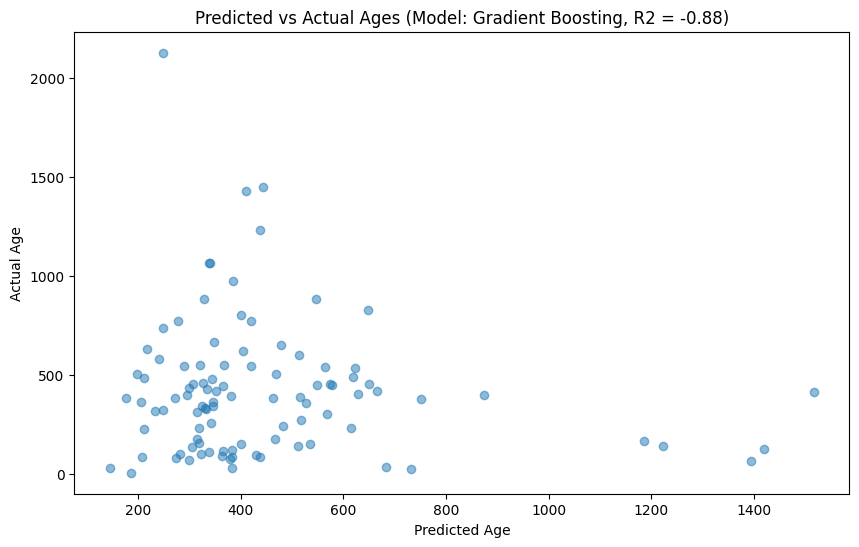

In [3]:
import matplotlib.pyplot as plt

for results in results_list:
    plt.figure(figsize=(10, 6))
    plt.scatter(results['predictions'], y, alpha=0.5)
    plt.xlabel('Predicted Age')
    plt.ylabel('Actual Age')
    plt.title(f'Predicted vs Actual Ages (Model: {results["model_name"]}, R2 = {results["mean_score"]:.2f})')

## 2. Classification analysis

In [1]:
from utils import load_data, cross_validate_classification, binarize_y

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X, y = load_data()
y_binary = binarize_y(y, threshold=360)

# Create models with scaling for Logistic Regression
models = [
    ('Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000))
    ])),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# ('Gradient Boosting', GradientBoostingClassifier())

results_list = []
for model_name, model in models:
    results = cross_validate_classification(X, y_binary, model=model, model_name=model_name)
    results_list.append(results)
    print(f'{results["model_name"]} ROC-AUC: {results["mean_score"]:.2f}')

Logistic Regression ROC-AUC: 0.59
Decision Tree ROC-AUC: 0.45
Random Forest ROC-AUC: 0.55


In [3]:
import numpy as np

for (model_name, _), results in zip(models, results_list):
    print(f'\n{model_name}:')
    print(f'ROC-AUC: {results["mean_score"]:.2f}')
    print('Confusion Matrix:')
    print(results['confusion_matrix'])
    print()


Logistic Regression:
ROC-AUC: 0.59
Confusion Matrix:
[[25 20]
 [21 32]]


Decision Tree:
ROC-AUC: 0.45
Confusion Matrix:
[[23 22]
 [31 22]]


Random Forest:
ROC-AUC: 0.55
Confusion Matrix:
[[21 24]
 [21 32]]



## 3. Classification with feature selection analysis

In [4]:
from utils import load_data, cross_validate_classification_with_feature_selection, binarize_y

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd

In [5]:
X, y = load_data()
y_binary = binarize_y(y, threshold=360)

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42))
]

# ('Gradient Boosting', GradientBoostingClassifier(n_estimators=50, max_depth=5, random_state=42))

# Test with feature selection
n_features = 10  # Adjust this value
results_list = []

for model_name, model in models:
    results = cross_validate_classification_with_feature_selection(
        X, y_binary, 
        model=model,
        n_features=n_features,
        selection_method='f_classif',
        cv=5
    )
    results_list.append((model_name, results))
    print(f'{model_name} ROC-AUC: {results["mean_score"]:.4f} ± {results["std_score"]:.4f}')

Logistic Regression ROC-AUC: 0.6109 ± 0.0994
Decision Tree ROC-AUC: 0.5865 ± 0.0914
Random Forest ROC-AUC: 0.6770 ± 0.0642


In [6]:
# Print confusion matrices
print(f'\n{"="*60}')
print(f'Results with {n_features} selected features')
print(f'{"="*60}')

for model_name, results in results_list:
    print(f'\n{model_name}:')
    print(f'ROC-AUC: {results["mean_score"]:.4f} ± {results["std_score"]:.4f}')
    
    # Format confusion matrix
    cm_df = pd.DataFrame(
        results['confusion_matrix'],
        index=['Actual 0', 'Actual 1'],
        columns=['Predicted 0', 'Predicted 1']
    )
    print('Confusion Matrix:')
    print(cm_df)
    print()


Results with 10 selected features

Logistic Regression:
ROC-AUC: 0.6109 ± 0.0994
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           23           22
Actual 1           20           33


Decision Tree:
ROC-AUC: 0.5865 ± 0.0914
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           24           21
Actual 1           16           37


Random Forest:
ROC-AUC: 0.6770 ± 0.0642
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           24           21
Actual 1           22           31



## 4. Data filtering for linear models

In [1]:
from utils import load_data, cross_validate_regression, filter_data_for_linear_model
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import os

max_outliers to remove: 49
Selecting 5 representative initial samples...
Initial 5 samples - R2: 0.9994, Correlation: 0.9999
Starting with samples: [30, 18, 22, 65, 27]
Target: keep at least 49 samples
Added sample 15 (to meet minimum): R2 = 0.9999, Correlation = 1.0000 (improvement: 0.0004)
Added sample 28 (to meet minimum): R2 = 0.9999, Correlation = 1.0000 (improvement: 0.0000)
Added sample 46 (to meet minimum): R2 = 0.9999, Correlation = 1.0000 (improvement: 0.0000)
Added sample 3 (to meet minimum): R2 = 0.9999, Correlation = 1.0000 (improvement: 0.0000)
Added sample 57 (to meet minimum): R2 = 0.9999, Correlation = 1.0000 (improvement: 0.0000)
Added sample 78 (to meet minimum): R2 = 0.9999, Correlation = 1.0000 (improvement: 0.0000)
Added sample 59 (to meet minimum): R2 = 1.0000, Correlation = 1.0000 (improvement: 0.0000)
Added sample 74 (to meet minimum): R2 = 1.0000, Correlation = 1.0000 (improvement: 0.0000)
Added sample 11 (to meet minimum): R2 = 1.0000, Correlation = 1.0000 (i

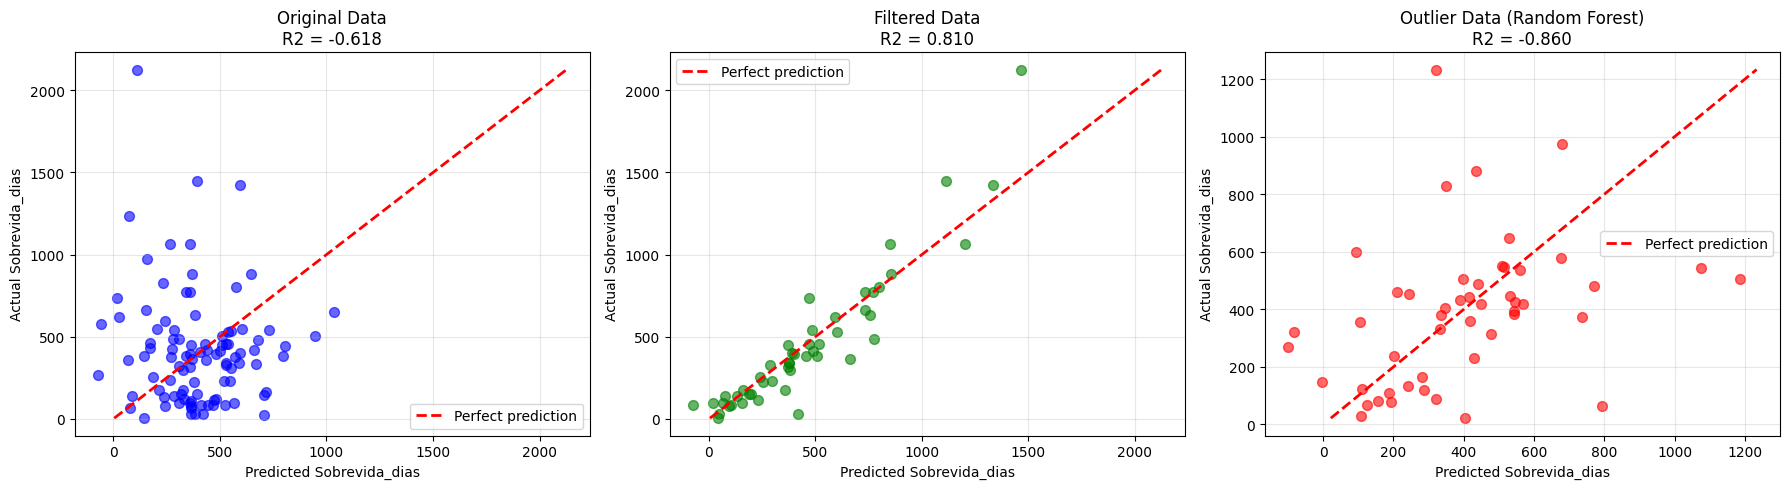

In [ ]:
# Load data
gene_tpm_path = os.path.join('data', 'TCGAGliomas_RNAm_Filtrado_QC_verif.csv')

X, y = load_data(gene_tpm_path=gene_tpm_path)

sel_rand_var = False

if sel_rand_var:
    num_var = 554
    rand_indexes = np.random.randint(0, X.shape[1], num_var)
    X = X.iloc[:, rand_indexes]

# Filter data for linear modeling
# Use greedy forward selection for better correlation
n_samples = X.shape[0]
max_outliers = int(n_samples * 0.5)
print(f"max_outliers to remove: {max_outliers}")
results = filter_data_for_linear_model(
    X, y,
    n_features=100,  # Select top 100 features (or use None with min_correlation/max_pvalue)
    # Alternative: use n_features=None with stricter criteria:
    # n_features=None,
    # min_correlation=0.1,  # Minimum correlation threshold
    # max_pvalue=0.05,  # Maximum p-value threshold
    sample_selection_method='greedy_forward',
    max_outliers_to_remove=max_outliers,
    min_r2_improvement=0.001,
    random_state=42
)

X_filtered = results['X_filtered']
y_filtered = results['y_filtered']

print("\nFiltered data:")
print(f"  Samples: {results['n_samples_filtered']} (removed {results['n_outliers_removed']} outliers)")
print(f"  Features: {results['n_features_selected']} (from {results['n_features_original']} original)")
print(f"\nR2 scores (Training - may be overfitted):")
print(f"  Initial (before filtering): {results['initial_r2_train']:.3f}")
print(f"  After filtering: {results['filtered_r2_train']:.3f}")
print(f"\nCorrelation scores (Training):")
print(f"  Initial (before filtering): {results['initial_correlation']:.3f}")
print(f"  After filtering: {results['filtered_correlation']:.3f}")
print(f"\nR2 scores (Cross-validated - more realistic):")
print(f"  Initial (before filtering): {results['initial_r2_cv']:.3f}")
print(f"  After filtering: {results['filtered_r2_cv']:.3f}")

# Extract kept and outlier samples
removed_samples = results['removed_samples']
selected_features = results['selected_features']

# Get TCGA codes for kept samples (filtered samples)
if isinstance(y_filtered, pd.Series):
    kept_tcga_codes = y_filtered.index.tolist()
elif isinstance(X_filtered, pd.DataFrame):
    kept_tcga_codes = X_filtered.index.tolist()
else:
    # If not DataFrame/Series, use indices from original data
    all_indices = list(range(len(y)))
    kept_tcga_codes = [idx for idx in all_indices if idx not in removed_samples]
    if isinstance(y, pd.Series):
        kept_tcga_codes = [y.index[i] for i in kept_tcga_codes]

# Get TCGA codes for outlier samples
if isinstance(removed_samples[0], str) if len(removed_samples) > 0 else False:
    # removed_samples are already TCGA codes (strings)
    outlier_tcga_codes = removed_samples
else:
    # removed_samples are indices, convert to TCGA codes
    if isinstance(y, pd.Series):
        outlier_tcga_codes = [y.index[i] for i in removed_samples]
    else:
        outlier_tcga_codes = removed_samples

# Create output directory if it doesn't exist
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Save to files
kept_file = os.path.join(output_dir, 'kept_samples_tcga_codes.csv')
outlier_file = os.path.join(output_dir, 'outlier_samples_tcga_codes.csv')

# Save kept samples
kept_df = pd.DataFrame({'TCGACode': kept_tcga_codes})
kept_df.to_csv(kept_file, index=False)
print(f"\nSaved {len(kept_tcga_codes)} kept TCGA codes to: {kept_file}")

# Save outlier samples
outlier_df = pd.DataFrame({'TCGACode': outlier_tcga_codes})
outlier_df.to_csv(outlier_file, index=False)
print(f"Saved {len(outlier_tcga_codes)} outlier TCGA codes to: {outlier_file}")

# Get outlier data (using selected features only)
if isinstance(X, pd.DataFrame):
    # If X is DataFrame, removed_samples might be sample names
    if isinstance(removed_samples[0], str) if len(removed_samples) > 0 else False:
        # removed_samples are sample names
        X_outliers = X.loc[removed_samples, selected_features]
        y_outliers = y.loc[removed_samples]
    else:
        # removed_samples are indices
        X_outliers = X.iloc[removed_samples][selected_features]
        y_outliers = y.iloc[removed_samples]
else:
    # X is numpy array
    X_outliers = X[np.array(removed_samples)][:, selected_features]
    y_outliers = y[np.array(removed_samples)]

print(f"\nOutlier samples: {len(y_outliers)} samples")

# Compare regression performance on original vs filtered data vs outliers
print("="*60)
print("Regression Comparison: Original vs Filtered Data vs Outliers")
print("="*60)

# Test on original data
results_original = cross_validate_regression(X, y, model=Ridge(), model_name='Ridge (Original)')
print(f"\nOriginal Data:")
print(f"  R2: {results_original['mean_score']:.3f} ± {results_original['std_score']:.3f}")

# Test on filtered data
results_filtered = cross_validate_regression(
    X_filtered, y_filtered, 
    model=Ridge(), 
    model_name='Ridge (Filtered)'
)
print(f"\nFiltered Data:")
print(f"  R2: {results_filtered['mean_score']:.3f} ± {results_filtered['std_score']:.3f}")
print(f"  Improvement: {results_filtered['mean_score'] - results_original['mean_score']:.3f}")

# Test on outliers (only if there are enough samples for CV)
# Use RandomForestRegressor for outliers as they may have non-linear patterns
if len(y_outliers) >= 5:
    results_outliers = cross_validate_regression(
        X_outliers, y_outliers,
        model=Ridge(),
        model_name='Ridge (Outliers)',
        cv=min(5, len(y_outliers))  # Use fewer folds if not enough samples
    )
    print(f"\nOutlier Data (Random Forest):")
    print(f"  R2: {results_outliers['mean_score']:.3f} ± {results_outliers['std_score']:.3f}")
else:
    print(f"\nOutlier Data:")
    print(f"  Too few samples ({len(y_outliers)}) for cross-validation")
    # Fit model on outliers for visualization
    model_outliers = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
    model_outliers.fit(X_outliers, y_outliers)
    predictions_outliers = model_outliers.predict(X_outliers)
    results_outliers = {
        'predictions': predictions_outliers,
        'mean_score': np.nan  # Can't compute CV R2 with too few samples
    }

# Visualize the filtering effect
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Original data predictions
axes[0].scatter(results_original['predictions'], y, alpha=0.6, s=50, color='blue')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect prediction')
axes[0].set_xlabel('Predicted Sobrevida_dias')
axes[0].set_ylabel('Actual Sobrevida_dias')
axes[0].set_title(f'Original Data\nR2 = {results_original["mean_score"]:.3f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Filtered data predictions
axes[1].scatter(results_filtered['predictions'], y_filtered, alpha=0.6, s=50, color='green')
axes[1].plot([y_filtered.min(), y_filtered.max()], 
             [y_filtered.min(), y_filtered.max()], 'r--', lw=2, label='Perfect prediction')
axes[1].set_xlabel('Predicted Sobrevida_dias')
axes[1].set_ylabel('Actual Sobrevida_dias')
axes[1].set_title(f'Filtered Data\nR2 = {results_filtered["mean_score"]:.3f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Outlier data predictions (using Random Forest)
if len(y_outliers) >= 5:
    axes[2].scatter(results_outliers['predictions'], y_outliers, alpha=0.6, s=50, color='red')
    axes[2].plot([y_outliers.min(), y_outliers.max()], 
                 [y_outliers.min(), y_outliers.max()], 'r--', lw=2, label='Perfect prediction')
    axes[2].set_xlabel('Predicted Sobrevida_dias')
    axes[2].set_ylabel('Actual Sobrevida_dias')
    axes[2].set_title(f'Outlier Data (Random Forest)\nR2 = {results_outliers["mean_score"]:.3f}')
else:
    axes[2].scatter(results_outliers['predictions'], y_outliers, alpha=0.6, s=50, color='red')
    axes[2].plot([y_outliers.min(), y_outliers.max()], 
                 [y_outliers.min(), y_outliers.max()], 'r--', lw=2, label='Perfect prediction')
    axes[2].set_xlabel('Predicted Sobrevida_dias')
    axes[2].set_ylabel('Actual Sobrevida_dias')
    axes[2].set_title(f'Outlier Data (Random Forest)\n(Too few samples for CV)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()